In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import glob
from keras.layers import BatchNormalization

In [8]:
# get the image directory
image_directory = r'Images\images\\'
# read metadata to get our Y values (multiple lables)
df = pd.read_csv('MetaData.csv').iloc[:,1:]    
df.head()    


,Roof_T,Roof_C1,geometry
0,Gable,Good,"POLYGON ((-10834917.921 3846233.887000002, -10..."
1,Mix,Good,"POLYGON ((-10834844.8473 3846502.442400008, -1..."
2,Gable,Good,POLYGON ((-10834617.17254094 3846911.695702523...
3,Gable,Good,"POLYGON ((-10834863.422 3846169.272, -10834848..."
4,Flat,Good,"POLYGON ((-10834869.107 3846218.079800002, -10..."


In [47]:
labels=pd.get_dummies(df.Roof_T)
#labels2=pd.get_dummies(df.Roof_C1)

In [48]:
#labels=pd.concat([labels,labels2],axis=1)
Classes=labels.columns
Y_Targets=labels.to_numpy()

In [50]:
print(Classes)

Index(['Flat', 'Gable', 'Hip', 'Mix'], dtype='object')


In [51]:
# get all file paths
file_paths=glob.glob(image_directory+"\\*.jpg")

In [52]:
# load images
SIZE = 200 #pixels
X_dataset = []  
for file in tqdm(file_paths):
    img = image.load_img(file, target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 538.92it/s]


In [53]:
#Convert to numpy
X = np.array(X_dataset)


In [54]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y_Targets, test_size=0.15)


In [56]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(Y_Targets.shape[1], activation='softmax'))

#Do not use softmax for multilabel classification

model.summary()

#Binary cross entropy of each label. So not really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 196, 196, 16)      1216      
_________________________________________________________________
batch_normalization_12 (Batc (None, 196, 196, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 47, 47, 32)       

In [57]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=30)


Epoch 1/20
13/13 [==============================] - 18s 1s/step - loss: 1.5253 - accuracy: 0.5499 - val_loss: 1.0465 - val_accuracy: 0.8030
Epoch 2/20
13/13 [==============================] - 19s 1s/step - loss: 0.9579 - accuracy: 0.6712 - val_loss: 0.7642 - val_accuracy: 0.8030
Epoch 3/20
13/13 [==============================] - 18s 1s/step - loss: 1.0232 - accuracy: 0.6712 - val_loss: 0.7018 - val_accuracy: 0.8030
Epoch 4/20
13/13 [==============================] - 20s 2s/step - loss: 0.9631 - accuracy: 0.7008 - val_loss: 0.8262 - val_accuracy: 0.8030
Epoch 5/20
13/13 [==============================] - 20s 2s/step - loss: 0.8047 - accuracy: 0.7574 - val_loss: 0.9012 - val_accuracy: 0.8030
Epoch 6/20
13/13 [==============================] - 19s 1s/step - loss: 0.8048 - accuracy: 0.7709 - val_loss: 0.9113 - val_accuracy: 0.8030
Epoch 7/20
13/13 [==============================] - 19s 1s/step - loss: 0.8271 - accuracy: 0.7601 - val_loss: 1.0704 - val_accuracy: 0.8030
Epoch 8/20
13/13 [==

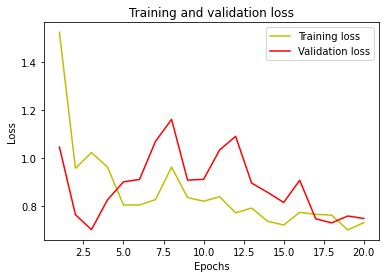

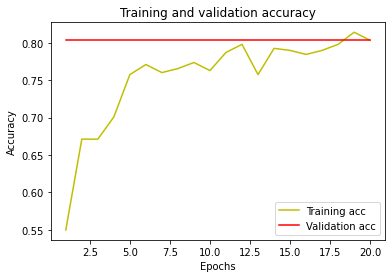

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
model.save("TrainedModel.hp5")

INFO:tensorflow:Assets written to: TrainedModel.hp5\assets


In [100]:
Tmodel=keras.models.load_model("TrainedModel.hp5")

In [145]:
preds=Tmodel.predict(X_test)

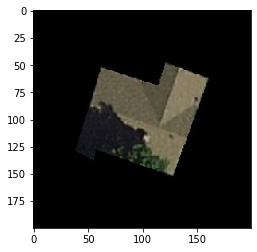

In [144]:
plt.imshow(X_test[2])

In [147]:
for i in range(preds.shape[0]):
    for l in range(preds.shape[1]):
        if preds[i][l]>0.65 or preds[i][l]<0.3:
            preds[i][l]=round(preds[i][l])
sum_idx=[]
for idx,val in enumerate(preds):
    if not val.sum()==1.0:
        sum_idx.append(idx)

In [148]:
sum_idx

[6, 7, 16, 24, 26, 36, 43, 46, 47, 48, 60, 61]

Flat=	0
Gable=	1
Hip=	2
Mix=	3


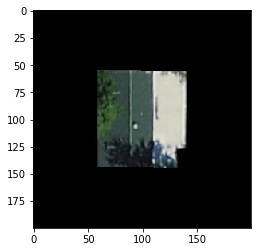


Label this Manually?:1


In [149]:
from IPython.display import clear_output
for val in sum_idx:
    dummy=np.array([0,0,0,0])
    [print(f"{val}=\t{idx}") for idx,val in enumerate(Classes)];
    plt.imshow(X_test[val])
    plt.show()
    inp=int(input(f"\nLabel this Manually?:"))

    while not inp in {0,1,2,3}:
        inp=int(input(f"\nLabel This Manually?:"))
    dummy[inp]=1
    preds[val]=dummy
    clear_output(wait=True)

In [150]:
pred_classes=[Classes[val] for val in np.argmax(preds,axis=1)]

In [153]:
df.Roof_T.value_counts()

Gable    354
Mix       47
Hip       29
Flat       7
Name: Roof_T, dtype: int64